In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import & Explore the dataset

In [3]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Convert the Total charges column data type into float


In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

Convert Senior Citizen Column from logical/int 1/0 to object like Yes/No for better ubderstanding

In [5]:
# #Method 1
df["SeniorCitizen"] = df["SeniorCitizen"].apply(lambda x : "Yes" if x == 1 else "No")


#Method 2
# def conv(value):
#     if value == 1:
#         return "Yes"
#     else:
#         return "No"
# df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

Checking Null values

In [11]:
df.isna().sum().sum()

np.int64(0)

Checking Duplicates

In [12]:
df.duplicated().sum()

np.int64(0)

In [15]:
df['customerID'].duplicated().sum()

np.int64(0)

In [32]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [33]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA

C:\Users\ToxsandBRO\AppData\Local\Temp\ipykernel_9636\3124140207.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn',


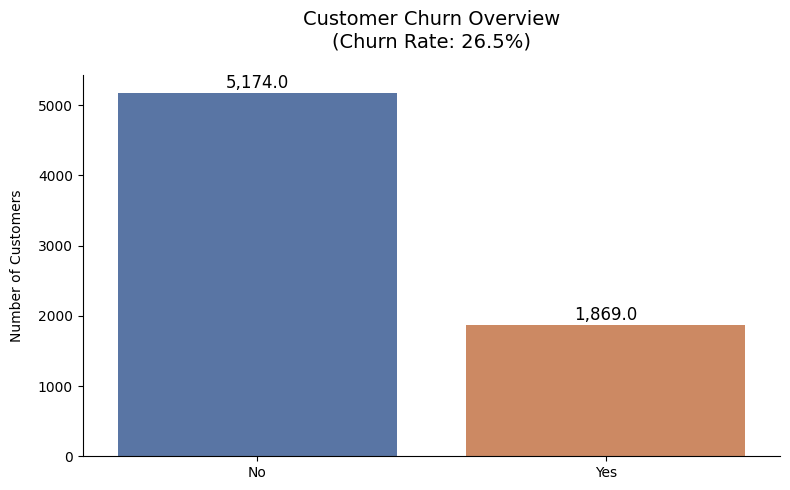

In [6]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Churn', 
                 data=df,
                 order=['No', 'Yes'],
                 palette=["#4c72b0", "#dd8452"])

# Add count labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', 
               (p.get_x() + p.get_width()/2., p.get_height()),
               ha='center', va='center', 
               xytext=(0, 7), 
               textcoords='offset points',
               fontsize=12)

# Calculate churn rate
churn_rate = df['Churn'].value_counts(normalize=True)['Yes']

# Simple title with key metric
plt.title(f"Customer Churn Overview\n(Churn Rate: {churn_rate:.1%})", 
         fontsize=14, pad=20)

# Clean axis labels
plt.xlabel("")
plt.ylabel("Number of Customers", labelpad=10)

# Remove chart borders
sns.despine()

plt.tight_layout()
plt.show()

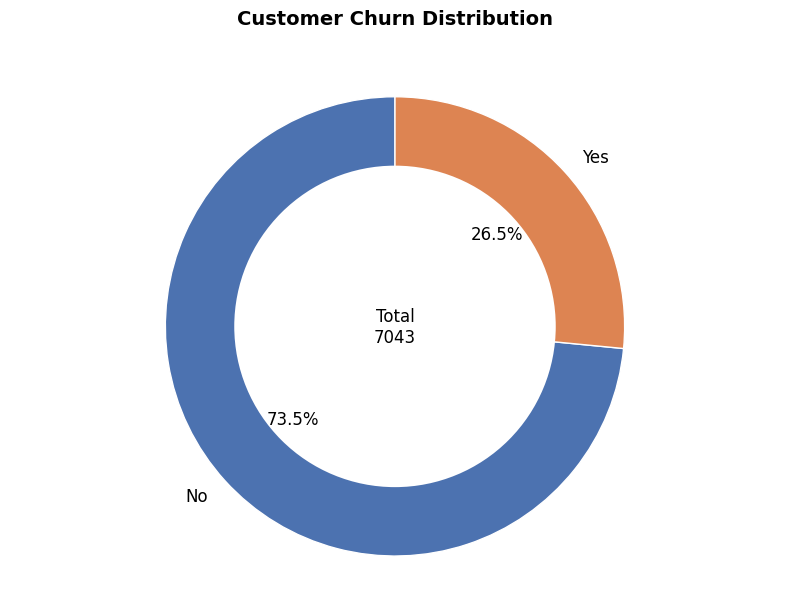

In [7]:
# Create the plot with proper dataframe handling
plt.figure(figsize=(8, 6))
gb = df['Churn'].value_counts()  # More efficient way to get counts

plt.pie(gb.values, 
        labels=gb.index, 
        colors=["#4c72b0", "#dd8452"],  # Blue (retained), Coral (churned)
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        textprops={'fontsize': 12})

# Draw circle to create donut
plt.gca().add_artist(plt.Circle((0,0), 0.70, fc='white'))

# Add title with padding
plt.title("Customer Churn Distribution\n", 
          fontsize=14, 
          fontweight='bold', 
          pad=20)

# Equal aspect ratio
plt.axis('equal')

# Add annotation with total count
plt.text(0, 0, f"Total\n{len(df)}", 
         ha='center', 
         va='center', 
         fontsize=12)

plt.tight_layout()
plt.show()

So we can colclude that 26.54% of our customers have churned out. Now Explore the reason behind it.

## --------------------------------------------

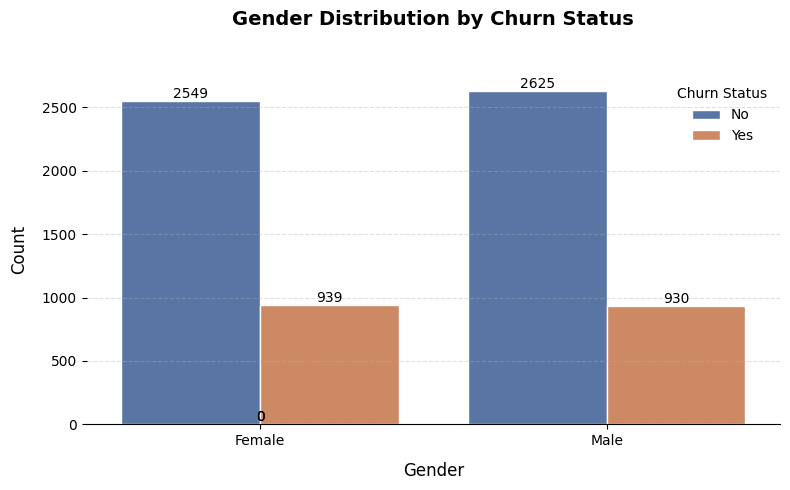

In [8]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='gender', 
                  data=df, 
                  hue='Churn',
                  palette=["#4c72b0", "#dd8452"],  # Consistent with our first chart
                  edgecolor="white",
                  linewidth=1)

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontsize=10)

# Style improvements
plt.title("Gender Distribution by Churn Status\n", 
          fontsize=14, 
          fontweight='bold', 
          pad=20)
plt.xlabel("Gender", fontsize=12, labelpad=10)
plt.ylabel("Count", fontsize=12, labelpad=10)
plt.legend(title='Churn Status', 
           bbox_to_anchor=(1, 1), 
           frameon=False)

# Custom grid and spines
sns.despine(left=True)
ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

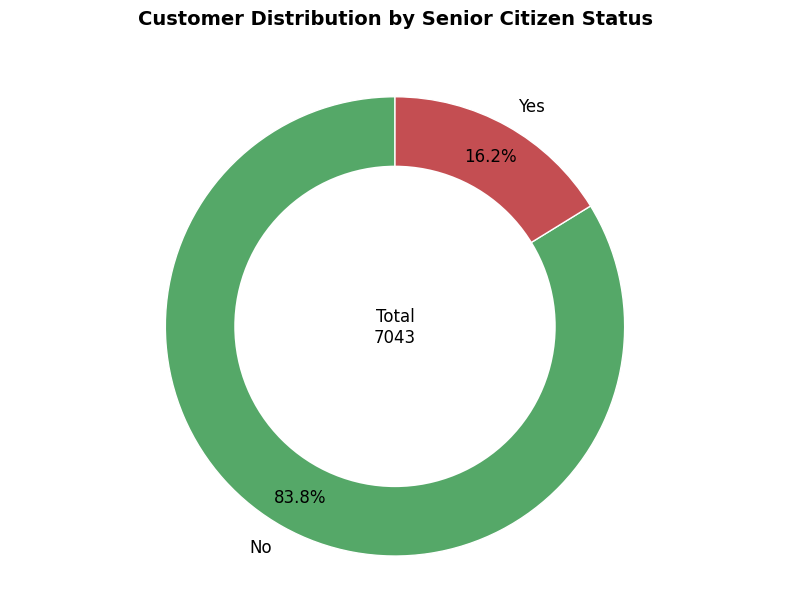

In [9]:
plt.figure(figsize=(8, 6))
gb = df['SeniorCitizen'].value_counts().rename(index={0: 'Non-Senior', 1: 'Senior'})

plt.pie(gb.values,
        labels=gb.index,
        colors=["#55a868", "#c44e52"],  # Green (non-senior), Red (senior)
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        textprops={'fontsize': 12},
        pctdistance=0.85)

# Create donut center
plt.gca().add_artist(plt.Circle((0,0), 0.70, fc='white'))

# Title and annotations
plt.title("Customer Distribution by Senior Citizen Status\n",
          fontsize=14,
          fontweight='bold',
          pad=20)
plt.text(0, 0, f"Total\n{len(df)}",
         ha='center',
         va='center',
         fontsize=12)

plt.axis('equal')
sns.despine()
plt.tight_layout()
plt.show()

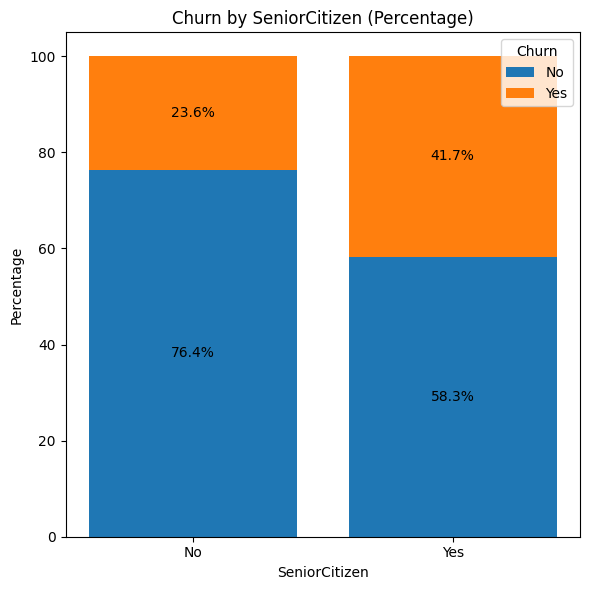

In [10]:
# Step 1: Calculate percentage data
churn_counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
churn_percent = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

# Step 2: Plot
fig, ax = plt.subplots(figsize=(6, 6))
bottom_vals = [0] * len(churn_percent)

for churn_value in churn_percent.columns:
    percents = churn_percent[churn_value]
    bars = ax.bar(churn_percent.index, percents, bottom=bottom_vals, label=churn_value)
    
    # Add percentage labels
    for i, bar in enumerate(bars):
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bottom_vals[i] + height / 2,
                f"{height:.1f}%",
                ha='center',
                va='center',
                fontsize=10
            )
    bottom_vals = [i + j for i, j in zip(bottom_vals, percents)]

# Final formatting
ax.set_title('Churn by SeniorCitizen (Percentage)')
ax.set_xlabel('SeniorCitizen')
ax.set_ylabel('Percentage')
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])
ax.legend(title='Churn')
plt.tight_layout()
plt.show()

Senior Cinitzens are comparetively more churned out than others even if the percentage of senior citizen is not much

C:\Users\ToxsandBRO\AppData\Local\Temp\ipykernel_9636\3658304468.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Status', frameon=False)


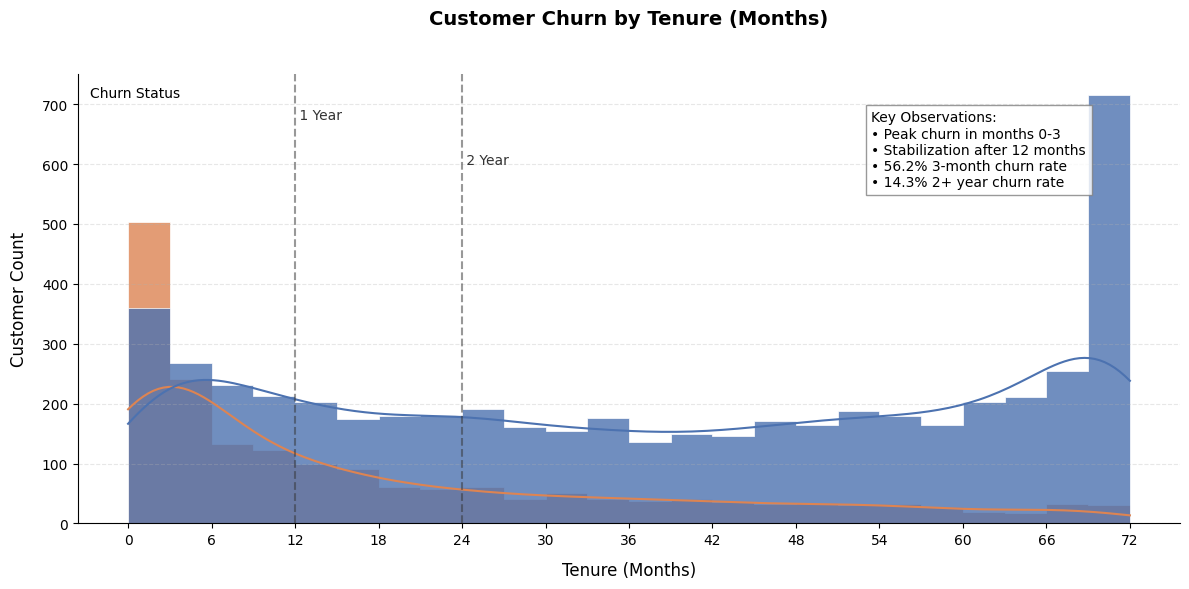

In [11]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(x='tenure', 
                  data=df, 
                  bins=24,  # 2-year view with monthly bins
                  hue='Churn',
                  palette=["#4c72b0", "#dd8452"],
                  element='step',
                  alpha=0.8,
                  edgecolor='white',
                  linewidth=0.5,
                  kde=True,
                  hue_order=['No', 'Yes'])

# Add reference lines
plt.axvline(x=12, color='#333333', linestyle='--', alpha=0.5)
plt.text(x=12, y=ax.get_ylim()[1]*0.9, s=' 1 Year', ha='left', color='#333333')
plt.axvline(x=24, color='#333333', linestyle='--', alpha=0.5)
plt.text(x=24, y=ax.get_ylim()[1]*0.8, s=' 2 Year', ha='left', color='#333333')

# Convert Churn to numeric for calculations
df['ChurnNumeric'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Add summary stats box (now with proper numeric conversion)
stats_text = f"""Key Observations:
• Peak churn in months 0-3
• Stabilization after 12 months
• {(df[df.tenure <= 3]['ChurnNumeric'].mean()*100):.1f}% 3-month churn rate
• {(df[df.tenure >= 24]['ChurnNumeric'].mean()*100):.1f}% 2+ year churn rate"""

plt.text(x=0.72, y=0.75, 
         s=stats_text, 
         transform=ax.transAxes,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='grey'),
         fontsize=10)

# Styling
plt.title("Customer Churn by Tenure (Months)\n", fontsize=14, fontweight='bold', pad=20)
plt.xlabel("Tenure (Months)", fontsize=12, labelpad=10)
plt.ylabel("Customer Count", fontsize=12, labelpad=10)
plt.legend(title='Churn Status', frameon=False)
sns.despine()
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(range(0, 73, 6))  # Show every 6 months
plt.tight_layout()
plt.show()

People who have used the services is styed and people who have used the servicess for for one or two months have churned.

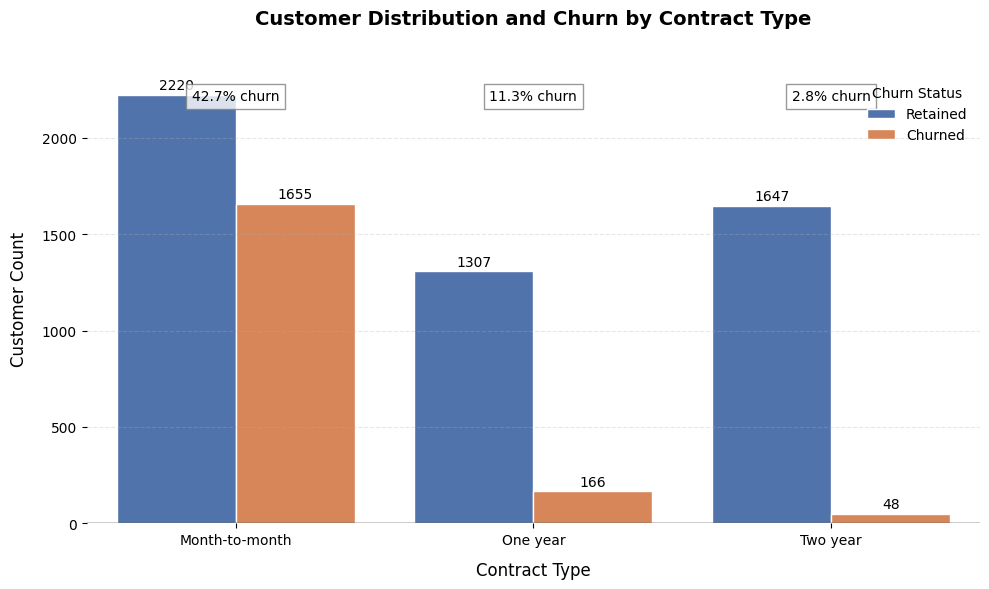

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Contract', 
                  data=df,
                  hue='Churn',
                  order=['Month-to-month', 'One year', 'Two year'],  # Logical ordering
                  palette=["#4c72b0", "#dd8452"],  # Consistent color scheme
                  saturation=0.9,
                  edgecolor='white',
                  linewidth=1)

# Add precise value labels
for container in ax.containers:
    ax.bar_label(container, 
                 fmt='%.0f', 
                 padding=2,
                 fontsize=10,
                 color='black')

# Calculate and annotate churn rates
for i, contract_type in enumerate(['Month-to-month', 'One year', 'Two year']):
    total = len(df[df['Contract'] == contract_type])
    churned = len(df[(df['Contract'] == contract_type) & (df['Churn'] == 'Yes')])
    churn_rate = (churned/total)*100
    ax.text(i, ax.get_ylim()[1]*0.95, 
            f'{churn_rate:.1f}% churn', 
            ha='center', 
            va='center',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='grey'))

# Enhanced styling
plt.title("Customer Distribution and Churn by Contract Type\n", 
          fontsize=14, 
          fontweight='bold', 
          pad=20)
plt.xlabel("Contract Type", fontsize=12, labelpad=10)
plt.ylabel("Customer Count", fontsize=12, labelpad=10)
plt.legend(title='Churn Status', 
           loc='upper right', 
           frameon=False,
           labels=['Retained', 'Churned'])

# Add reference line and grid
ax.axhline(y=0, color='black', linewidth=1)
ax.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

Chrun is high for short term contact like month to month. For the long term contract churn rate is very low.

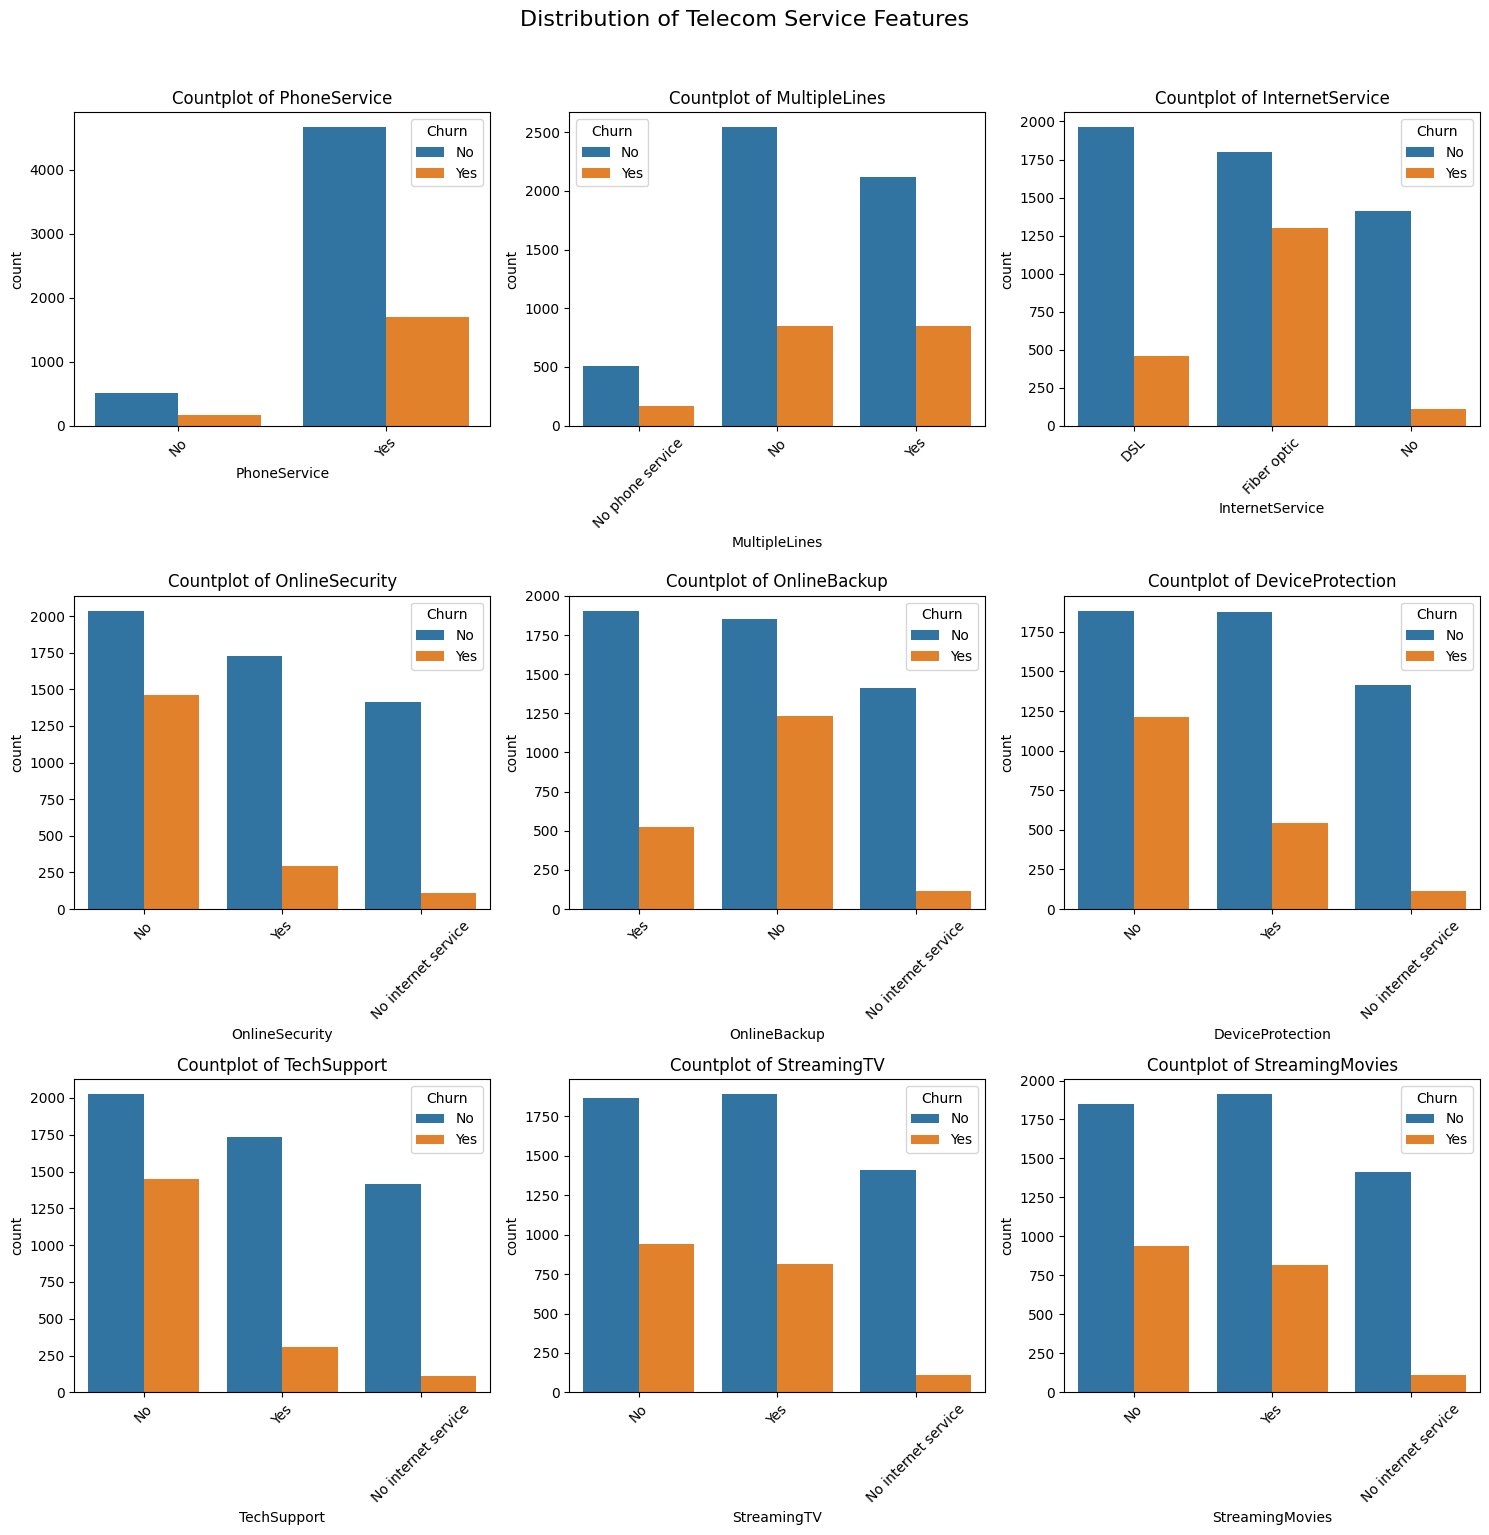

In [13]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
           'StreamingTV', 'StreamingMovies']

# Number of columns for subplot grid, you can change this as you like
n_cols = 3  
n_rows = (len(columns) + n_cols - 1) // n_cols  # Ceiling division for rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # flatten in case it's a 2D array

for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i], hue= df["Churn"])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].tick_params(axis='x', rotation=45)  # rotate labels for readability if needed

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.suptitle('Distribution of Telecom Service Features', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


 Customers with Fiber optic internet service exhibit the highest churn rates, while those without any internet service or phone service show minimal churn. For online services like Security, Backup, Device Protection, Tech Support, Streaming TV, and Movies, customers who do not subscribe tend to have a higher likelihood of churning compared to those who do.

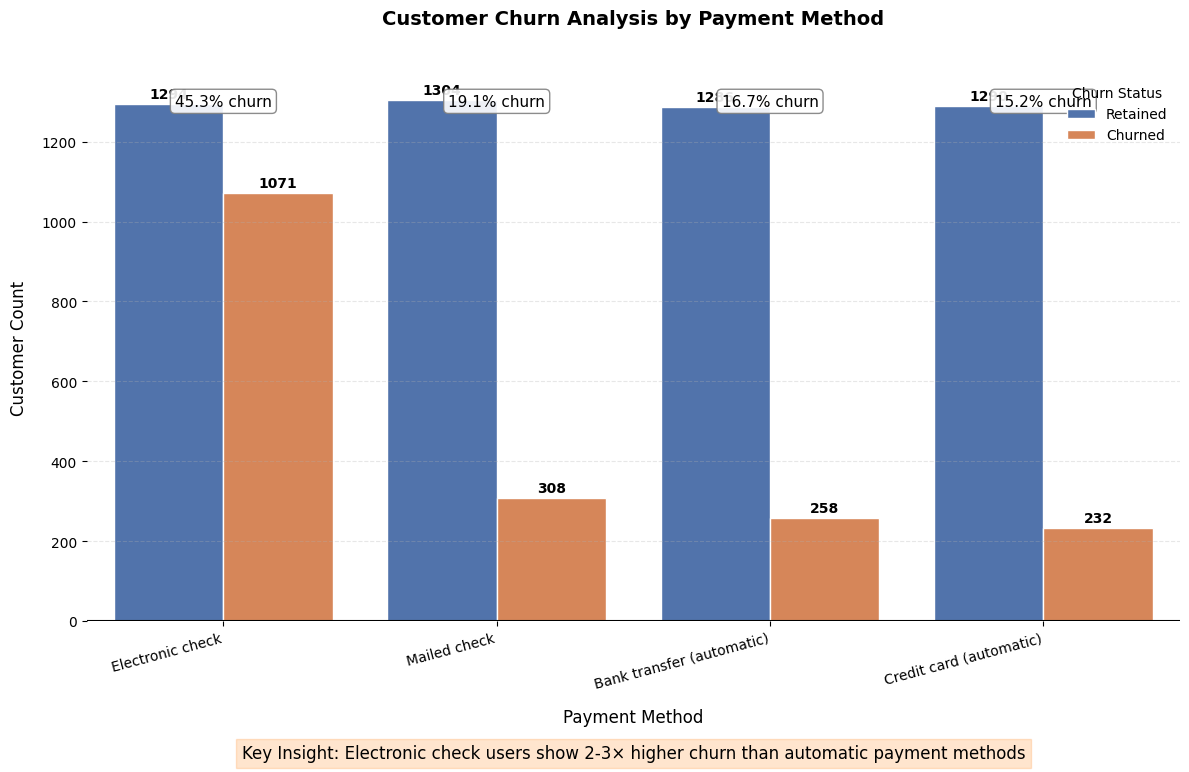

In [14]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='PaymentMethod', 
                  data=df,
                  hue='Churn',
                  order=['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'],  # Manual->Auto ordering
                  palette=["#4c72b0", "#dd8452"],  # Consistent color scheme
                  saturation=0.9,
                  edgecolor='white',
                  linewidth=1)

# Add precise value labels with contrast
for container in ax.containers:
    ax.bar_label(container, 
                fmt='%.0f', 
                padding=2,
                fontsize=10,
                color='black',
                weight='bold')  # Improved readability

# Calculate and annotate churn rates
for i, method in enumerate(['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']):
    total = len(df[df['PaymentMethod'] == method])
    churned = len(df[(df['PaymentMethod'] == method) & (df['Churn'] == 'Yes')])
    churn_rate = (churned/total)*100
    ax.text(i, ax.get_ylim()[1]*0.95, 
            f'{churn_rate:.1f}% churn', 
            ha='center', 
            va='center',
            fontsize=11,
            bbox=dict(facecolor='white', alpha=0.9, edgecolor='grey', boxstyle='round,pad=0.3'))

# Rotate x-labels for better readability
plt.xticks(rotation=15, ha='right')

# Enhanced styling
plt.title("Customer Churn Analysis by Payment Method\n", 
          fontsize=14, 
          fontweight='bold', 
          pad=20)
plt.xlabel("Payment Method", fontsize=12, labelpad=12)
plt.ylabel("Customer Count", fontsize=12, labelpad=10)
plt.legend(title='Churn Status', 
           loc='upper right', 
           frameon=False,
           labels=['Retained', 'Churned'])

# Add horizontal baseline and grid
ax.axhline(y=0, color='black', linewidth=1.5)
ax.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine(left=True, bottom=True)

# Add insight annotation
plt.text(x=0.5, y=-0.25, 
         s="Key Insight: Electronic check users show 2-3× higher churn than automatic payment methods", 
         transform=ax.transAxes,
         ha='center',
         fontsize=12,
         bbox=dict(facecolor='#ff7f0e', alpha=0.2, edgecolor='#ff7f0e'))

plt.tight_layout()
plt.show()

Customer Churn is higher for Electronic Check Payment Method Compared to the autometic checks.